<a href="https://colab.research.google.com/github/RodrigoAnt93/Exercicio-Casa-Senac/blob/main/Exerc%C3%ADcio_casa_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 8)

# **Analisando a evolução do boxscore da NBA.**

Nesse projeto vamos tentar analisar as mudanças que ocorreram na NBA durante 30 anos. Com o avanço da tecnologia o esporte americano mudou fortemente sua forma de jogar e é isso que queremos mostrar nessa análise.

# **Objetivos:**



*   Analisar a média de idade das temporadas.
*   Analisar a quantidade de pontos das temporadas.
*   Analisar a importância dos rebotes entre as temporadas.





# **1° Puxar os dados e tratalos:**

In [84]:
season_stats_url = "https://raw.githubusercontent.com/will-lucena/Data-science-class-project/master/Seasons_Stats.csv"

In [85]:
season_data = pd.read_csv(season_stats_url)

In [86]:
display(season_data.head())
print(season_data.shape)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


(24691, 53)


In [87]:
season_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [88]:
boxscore = season_data[['Year', 'Pos', 'Age', 'FG', 'FG%', '3P',
                        '3P%', '2P', '2P%', 'FT', 'FT%', 'ORB', 'ORB%', 'DRB', 'DRB%', 'TRB', 'TRB%', 'AST',
                        'STL', 'BLK', 'TOV', 'PF', 'PTS']]
display(boxscore)

,Year,Pos,Age,FG,FG%,3P,3P%,2P,2P%,FT,...,DRB,DRB%,TRB,TRB%,AST,STL,BLK,TOV,PF,PTS
0,1950.0,G-F,31.0,144.0,0.279,NaN,NaN,144.0,0.279,170.0,...,NaN,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,SG,29.0,102.0,0.372,NaN,NaN,102.0,0.372,75.0,...,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,SF,25.0,174.0,0.349,NaN,NaN,174.0,0.349,90.0,...,NaN,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,F,24.0,22.0,0.256,NaN,NaN,22.0,0.256,19.0,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,F,24.0,21.0,0.256,NaN,NaN,21.0,0.256,17.0,...,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,PF,24.0,253.0,0.571,0.0,0.000,253.0,0.572,133.0,...,270.0,17.3,405.0,12.9,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,C,27.0,78.0,0.494,0.0,0.000,78.0,0.497,22.0,...,81.0,17.0,124.0,13.2,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,C,20.0,10.0,0.323,0.0,NaN,10.0,0.323,3.0,...,24.0,24.9,35.0,17.6,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,SF,22.0,88.0,0.398,33.0,0.333,55.0,0.451,31.0,...,110.0,14.2,125.0,8.0,36.0,15.0,16.0,40.0,78.0,240.0


In [89]:
boxscore = boxscore.drop_duplicates()

In [90]:
boxscore_2015 = boxscore.loc[boxscore['Year'] == 2015.0]
boxscore_1985 = boxscore.loc[boxscore['Year'] == 1985.0]
boxscore_conc = pd.concat([boxscore_1985, boxscore_2015])

In [91]:
boxscore_conc.isnull().sum()

Year      0
Pos       0
Age       0
FG        0
FG%       2
3P        0
3P%     162
2P        0
2P%       4
FT        0
FT%      37
ORB       0
ORB%      0
DRB       0
DRB%      0
TRB       0
TRB%      0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

# **2° Analisando os dados das temporadas 1985 e 2015:**

# **Idade:**

In [92]:
display(boxscore_1985.Age.describe())
print('=-' * 20)
display(boxscore_2015.Age.describe())

count    362.000000
mean      26.179558
std        3.169858
min       21.000000
25%       24.000000
50%       25.000000
75%       28.000000
max       37.000000
Name: Age, dtype: float64

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


count    651.000000
mean      26.500768
std        4.110914
min       19.000000
25%       23.000000
50%       26.000000
75%       29.000000
max       38.000000
Name: Age, dtype: float64

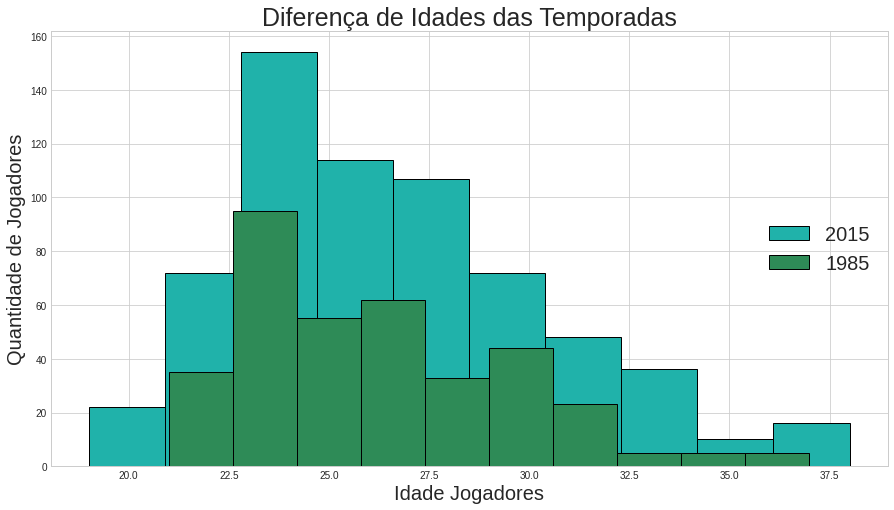

In [93]:
idade_2015 = boxscore_2015.Age
idade_1985 = boxscore_1985.Age
plt.style.use('seaborn-whitegrid')
plt.hist(idade_2015, label = "2015", color = 'lightseagreen', edgecolor = 'black')
plt.hist(idade_1985, label = "1985", color = 'seagreen', edgecolor = 'black')
plt.title("Diferença de Idades das Temporadas", fontsize = 25)
plt.xlabel('Idade Jogadores', fontsize = 20)
plt.ylabel("Quantidade de Jogadores", fontsize = 20)
plt.legend(loc = 'right', fontsize = 20)
plt.grid(True)
plt.show()

**Conclusões:**

*   A diferença de idade dos jogadores que chegam a liga. De 21 anos em 1985 para 19 anos em 2015.
*   Em 2015 a quantidade de jogares com mais de 35 anos é praticamente igual a quantidade de jogadores novos que chegam a liga. Realidade muito diferente em 1985. 
*   Em 2015 existe uma gradual queda de jogadores quando comparamos jogadores x idade, o que não acontece em 1985. Acredito que isso acontece devido aos jogadores trocarem a NBA por outras ligas européias em 1985.
*   A enorme diferença da quantidade de jogadores entre as temporadas.





# Pontos:

*   Field Goal (FG): São os arremessos de quadra.
*   Field Goal% (FG%): São as pocentagens de acerto dos arremessos.
*   PTS = Quantidade de pontos do jogador.
*   Blocks (BLK): Significa toco(bloqueio).
*   Turnover (TOV): Quando a equipe no ataque comete um erro na qual perde a posse de bola, seja por um passe errado ou por uma violação de quadra, como andar com a bola ou pisar fora da quadra.







In [94]:
pontos_2015 = boxscore_2015[['FG', 'FG%', 'PTS', 'BLK', 'TOV']]
pontos_1985 = boxscore_1985[['FG', 'FG%', 'PTS', 'BLK', 'TOV']]

In [95]:
print('Dados 2015:')
display(pontos_1985.head())
print('=-' * 20)
print('Dados 1985:')
display(pontos_2015.head())

Dados 2015:


,FG,FG%,PTS,BLK,TOV
7559,723.0,0.599,1735.0,162.0,197.0
7560,476.0,0.520,1202.0,48.0,197.0
7561,794.0,0.506,2055.0,24.0,253.0
7562,419.0,0.529,971.0,6.0,149.0
7563,161.0,0.478,377.0,15.0,72.0


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Dados 1985:


,FG,FG%,PTS,BLK,TOV
22865,152.0,0.459,398.0,22.0,60.0
22866,35.0,0.407,94.0,7.0,14.0
22867,217.0,0.544,537.0,86.0,99.0
22868,19.0,0.432,60.0,9.0,9.0
22869,375.0,0.424,1035.0,7.0,116.0


In [96]:
print('Dados 2015:')
display(pontos_2015.describe())
print('=-' * 35)
print('Dados 1985:')
display(pontos_1985.describe())

Dados 2015:


,FG,FG%,PTS,BLK,TOV
count,651.000000,649.000000,651.000000,651.000000,651.000000
mean,160.778802,0.427404,428.067588,20.072197,59.511521
std,148.971531,0.100285,401.564362,29.058392,55.845731
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.500000,0.389000,90.000000,2.000000,13.500000
50%,120.000000,0.426000,308.000000,10.000000,46.000000
75%,251.000000,0.472000,658.000000,23.000000,90.500000
max,659.000000,1.000000,2217.000000,200.000000,321.000000


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Dados 1985:


,FG,FG%,PTS,BLK,TOV
count,362.000000,362.000000,362.000000,362.000000,362.000000
mean,232.571823,0.457511,588.911602,28.566298,93.781768
std,216.194220,0.103019,550.389057,44.111635,76.914201
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.250000,0.438000,132.250000,4.000000,29.250000
50%,175.000000,0.476000,431.500000,13.000000,75.500000
75%,365.250000,0.510750,961.250000,33.000000,147.750000
max,939.000000,0.750000,2313.000000,456.000000,326.000000


**Conclusão:**
  
*   Os números mostram que em 1985 tínhamos os jogos com mais intensidade do que em 2015. Com médias maiores em 31% nos chutes e 27% nos pontos.
*   Esse jogo mais frenético deixa a parte tática um pouco de lado e fazem os números dos BLK e TOV subirem muito também.
*   A ideia que TOV faz perder jogo já é consolidado na NBA. A queda da média dos TOV entre as temporadas, mostra a evolução técnica para evitar os erros.





# Rebotes:

*   ORB: Rebotes no campo ofensivo.
*   DRB: Rebotes no campo defensivo.
*   TRB: Total de rebote do jogador

*   Os '%' que dizer a média de vezes que aquele rebote foi convertido em pontos.



In [97]:
reb_2015 = boxscore_2015[['ORB', 'ORB%', 'DRB', 'DRB%', 'TRB', 'TRB%']]
reb_1985 = boxscore_1985[['ORB', 'ORB%', 'DRB', 'DRB%', 'TRB', 'TRB%']]

In [98]:
print('Dados 2015:')
display(reb_2015.describe())
print('=-' * 15)
print('Dados 1985:')
display(reb_1985.describe())

Dados 2015:


,ORB,ORB%,DRB,DRB%,TRB,TRB%
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,46.414747,5.101843,137.298003,14.214286,183.712750,9.646697
std,56.505820,4.346372,130.956177,6.929651,181.471919,5.103688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.900000,31.000000,9.600000,40.000000,6.000000
50%,27.000000,3.500000,106.000000,12.900000,138.000000,8.300000
75%,61.500000,7.700000,196.500000,17.900000,262.000000,12.750000
max,437.000000,38.700000,829.000000,76.600000,1226.000000,57.800000


=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Dados 1985:


,ORB,ORB%,DRB,DRB%,TRB,TRB%
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,76.900552,6.788398,155.776243,12.573481,232.676796,9.682044
std,74.140998,4.330255,151.900489,6.603744,221.240454,4.853971
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.250000,3.500000,36.750000,7.425000,58.500000,5.725000
50%,56.500000,6.900000,116.000000,11.250000,178.500000,9.100000
75%,115.500000,9.000000,230.500000,17.700000,344.000000,13.500000
max,440.000000,39.600000,720.000000,37.700000,1031.000000,38.600000


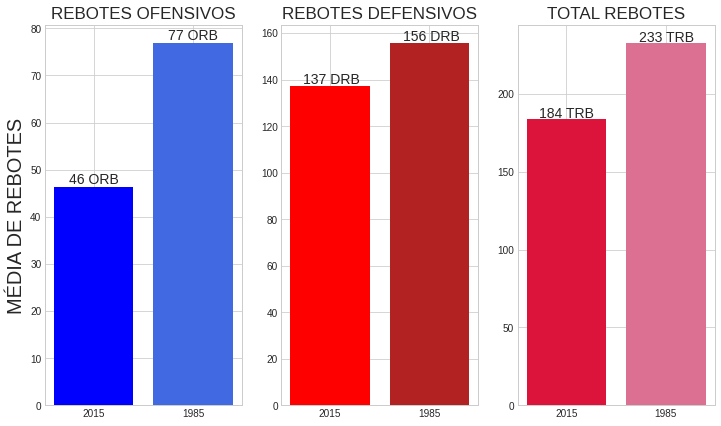

In [99]:
fig, axes = plt.subplots(1, 3, figsize= (12, 7))
xanos = ('2015', '1985')

yorb = (reb_2015.ORB.mean(), reb_1985.ORB.mean())
axes[0].bar(xanos, yorb, color = ['blue', 'royalblue'])
axes[0].set_ylabel('MÉDIA DE REBOTES', fontsize = 20)
axes[0].set_title('REBOTES OFENSIVOS', fontsize = 17)
for idx, vals in enumerate(yorb):
  txt = (f'{vals:.0f} ORB')
  y_coord = vals + 0.7
  x_coord = idx - 0.25
  axes[0].text(x = x_coord,  y = y_coord, s=txt, fontsize = 14)

ydrb = (reb_2015.DRB.mean(), reb_1985.DRB.mean())
axes[1].bar(xanos, ydrb, color = ['red', 'firebrick'])
axes[1].set_title('REBOTES DEFENSIVOS', fontsize = 17)
for idx, vals in enumerate(ydrb):
  txt = (f'{vals:.0f} DRB')
  yd_coord = vals + 0.9
  xd_coord = idx - 0.27
  axes[1].text(x = xd_coord, y = yd_coord, s = txt, fontsize = 14)

ytrb = (reb_2015.TRB.mean(), reb_1985.TRB.mean())
axes[2].bar(xanos, ytrb, color = [ 'crimson' ,'palevioletred'])
axes[2].set_title('TOTAL REBOTES', fontsize = 17)
for idx, vals in enumerate(ytrb):
  txt = (f'{vals:.0f} TRB')
  yt_coord = vals + 0.9
  xt_coord = idx - 0.27
  axes[2].text(x = xt_coord, y = yt_coord, s = txt, fontsize = 14)

**Conclusões:**

*   Durante 30 anos o ORB se tornou um pecada capital na NBA. É muito difícil vencer um jogo cedendo a bola na sua defesa e dando a oportunidade para o time rival chutar novamente. A diferença na média do ORB mostra bem como nesse sentido o jogo mudou. 
*   Se o ORB cai, o DRB aumenta e notamos como a diferença das médias caem de uma temporada para outra comparando com o ORB. A forma que os times defende o garrafão hoje em dia faz o DRB ser bem mais alto do que o ORB.
*   O TRB% das temporadas são iguais mesmo com a diferença de números. Igual as TOV, os rebotes são vistos como determinantes para se vencer um jogo na NBA. Mesmo com menor volume em 2015, a precisão é mantida.




